In [1]:
import pandas as pd
from scripts.classes import *
import numpy as np
from pynwb import NWBHDF5IO

In [2]:
''' 
This is data from the mouse brain.
'''

# Now you can import the script directly
filepath = "/Users/michaelhofer/Documents/Uni/Mouse_data/mouse_10/sub-10_ses-mouse-10-session-date-2017-09-21-area-V1-L23-multi-plane-imaging_behavior+ophys.nwb"
# Open the file in read mode "r", and specify the driver as "ros3" for S3 files
io = NWBHDF5IO(filepath, mode="r", load_namespaces=True)

nwbfile = io.read()
#print(nwbfile.processing['ophys']['ImageSegmentation'])
print(nwbfile)

/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0/venv/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0/venv/lib/python3.11/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


root pynwb.file.NWBFile at 0x10972074896
Fields:
  acquisition: {
    Virmen_forward_lateral_velocity_timeseries <class 'pynwb.base.TimeSeries'>,
    Virmen_maze_world_timeseries <class 'pynwb.base.TimeSeries'>,
    Virmen_positions <class 'pynwb.behavior.Position'>,
    Virmen_reward_timeseries <class 'pynwb.base.TimeSeries'>,
    Virmen_trial_number_timeseries <class 'pynwb.base.TimeSeries'>,
    Virmen_trial_phase_timeseries <class 'pynwb.base.TimeSeries'>,
    imaging_frame_timeseries <class 'pynwb.base.TimeSeries'>,
    lick_timeseries <class 'pynwb.base.TimeSeries'>,
    raw_velocity_timeseries <class 'pynwb.base.TimeSeries'>,
    virmen_frame_timeseries <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    two_photon_microscope <class 'pynwb.device.Device'>
  }
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Mouse performing a dynamic navigation task with calcium imaging in V1 layer 2/3
  experimenter: ['Tseng, Shih-Yi']
  file_create_date: [datetim

In [5]:
# convert the first PlaneSegmentation into dataframe and examine the information
planeSeg_0_df = nwbfile.processing['ophys']['ImageSegmentation']['PlaneSegmentation_0'].to_dataframe()
planeSeg_0_df.head(5)


,ml,ap,depth,area,mTagBFP2,mScarlet,pixel_mask
id,,,,,,,
0,-2.71753,-3.21788,0.11,V1,False,False,"[[229, 76, 91947.16], [230, 76, 130799.37], [2..."
1,-2.76642,-3.16481,0.11,V1,False,False,"[[264, 113, 45804.51], [265, 113, 64200.27], [..."
2,-3.02527,-3.00245,0.11,V1,False,False,"[[443, 226, 84415.805], [444, 226, 89784.02], ..."
3,-2.91319,-3.04176,0.11,V1,True,False,"[[367, 200, 7744.4453], [362, 201, 7726.138], ..."
4,-2.56678,-2.80399,0.11,V1,False,False,"[[138, 389, 93532.75], [139, 389, 125248.22], ..."


In [6]:
planeSeg_1_df = nwbfile.processing['ophys']['ImageSegmentation']['PlaneSegmentation_1'].to_dataframe()
planeSeg_1_df.head(5)


,ml,ap,depth,area,mTagBFP2,mScarlet,pixel_mask
id,,,,,,,
0,-2.95400,-3.18223,0.135,V1,False,False,"[[392, 94, 83351.695], [390, 95, 114739.25], [..."
1,-2.98163,-3.05691,0.135,V1,False,False,"[[416, 186, 56723.324], [413, 187, 80539.586],..."
2,-2.91070,-3.06750,0.135,V1,False,False,"[[365, 180, 80846.27], [363, 181, 149728.64], ..."
3,-2.96390,-3.08106,0.135,V1,False,False,"[[399, 169, 28872.766], [400, 169, 38046.91], ..."
4,-2.72885,-3.13178,0.135,V1,True,False,"[[240, 138, 28320.355], [241, 138, 46234.293],..."


In [7]:
planeSeg_2_df = nwbfile.processing['ophys']['ImageSegmentation']['PlaneSegmentation_2'].to_dataframe()
planeSeg_2_df.head(5)


,ml,ap,depth,area,mTagBFP2,mScarlet,pixel_mask
id,,,,,,,
0,-2.91131,-3.18806,0.16,V1,False,False,"[[360, 91, 54930.727], [361, 91, 75757.94], [3..."
1,-2.71997,-3.23832,0.16,V1,False,False,"[[229, 59, 7588.5737], [230, 59, 24319.465], [..."
2,-3.07460,-3.02618,0.16,V1,False,False,"[[476, 205, 58761.53], [475, 206, 65408.08], [..."
3,-2.93263,-3.06483,0.16,V1,False,False,"[[384, 177, 25690.758], [385, 177, 42493.086],..."
4,-2.93650,-3.05025,0.16,V1,False,False,"[[381, 193, 11848.666], [382, 193, 13957.475],..."


In [8]:
planeSeg_3_df = nwbfile.processing['ophys']['ImageSegmentation']['PlaneSegmentation_3'].to_dataframe()
planeSeg_3_df.head(5)

,ml,ap,depth,area,mTagBFP2,mScarlet,pixel_mask
id,,,,,,,
0,-2.90024,-3.21667,0.185,V1,False,False,"[[352, 70, 58032.016], [353, 70, 109587.08], [..."
1,-2.83373,-3.15525,0.185,V1,False,False,"[[308, 118, 79220.5], [309, 118, 168796.22], [..."
2,-2.68273,-2.81872,0.185,V1,False,False,"[[218, 373, 28557.105], [216, 374, 60481.227],..."
3,-2.73298,-3.19934,0.185,V1,False,False,"[[242, 89, 29695.287], [243, 89, 24451.21], [2..."
4,-2.72714,-3.16921,0.185,V1,False,False,"[[239, 109, 13588.58], [238, 110, 16706.602], ..."


In [8]:
# convert trial table into dataframe and examine it
'''
INFORMATION
The trial table contains basic information about trials, including:

start_time: start time of this trial from session onset in second
stop_time: stop time of this trial from session onset in second
is_vis: whether the trial was a visually guided trial
is_ruleA: whether the trial happened during rule A; rule A: BL & WR, rule B: WL & BR
is_switch: whether a rule switch happened on the trial
is_cueB: whether the trial had a black cue; True: black, False: white
is_choL: whether the mouse made a left choice on the trial; True: left, False: right
is_correct: whether the trial was correct

association_mat: behavioral LSTM predicted conditional probability; order: P(R|W), P(L|W), P(R|B), P(L|B)
rule_belief: the rule belief on the trial; directionality: positive: rule B, negative: rule A
signed_bias: the singed choice bias on the trial; directionality: positive: left bias, negative: right bias
rule_following: the rule-following on the trial; values between -0.5 ~ 0.5
bias_following: the bias-following on the trial; between -0.5 ~ 0.5
prob_actual_cho: the probability of actual choice on the trial, i.e. P(actual choice|actual cue)
Other information:

trial_onset_plane_frame_idx: for each imaging plane, the frame index for this trial's onset
trial_offset_plane_frame_idx: for each imaging plane, the frame index for this trial's offset
'''
trial_df = nwbfile.trials.to_dataframe()
trial_df.iloc[0:20]

,start_time,stop_time,is_vis,is_ruleA,is_switch,is_cueB,is_choL,is_correct,association_mat,rule_belief,signed_bias,rule_following,bias_following,prob_actual_cho,trial_onset_plane_frame_idx,trial_offset_plane_frame_idx
id,,,,,,,,,,,,,,,,
0,27.40725,38.93475,False,True,False,False,False,True,"[0.1915447860956192, 0.808455228805542, 0.1745...",0.017014,0.633925,0.008507,-0.316962,0.191545,"[95, 95, 95, 95, 94]","[132, 132, 132, 132, 132]"
1,38.95450,53.71500,True,True,False,False,False,True,"[0.4683721661567688, 0.5316278338432312, 0.381...",0.087143,0.150398,0.043571,-0.075199,0.468372,"[165, 164, 164, 164, 164]","[221, 221, 221, 220, 220]"
2,53.73325,67.30600,False,True,False,False,False,True,"[0.5884299874305725, 0.4115700125694275, 0.568...",0.020030,-0.156830,0.010015,0.078415,0.588430,"[253, 253, 253, 253, 252]","[302, 302, 302, 302, 302]"
3,67.32600,79.86375,False,True,False,False,False,True,"[0.6695836782455444, 0.3304162919521332, 0.633...",0.036280,-0.302887,0.018140,0.151444,0.669584,"[335, 334, 334, 334, 334]","[378, 378, 377, 377, 377]"
4,79.88150,93.72075,False,True,False,False,False,True,"[0.740466296672821, 0.25953370332717896, 0.670...",0.069668,-0.411264,0.034834,0.205632,0.740466,"[410, 410, 410, 409, 409]","[461, 461, 460, 460, 460]"
5,93.74100,108.77025,False,True,False,True,False,False,"[0.7668509483337402, 0.23314903676509857, 0.68...",0.080717,-0.452985,-0.040358,0.226493,0.686134,"[493, 493, 493, 492, 492]","[540, 540, 540, 539, 539]"
6,108.79675,125.56775,False,True,False,True,False,False,"[0.625546932220459, 0.37445303797721863, 0.504...",0.120789,-0.130305,-0.060394,0.065152,0.504758,"[583, 583, 583, 583, 582]","[641, 641, 640, 640, 640]"
7,125.58625,141.22050,True,True,False,True,True,True,"[0.6251654624938965, 0.37483450770378113, 0.50...",0.118504,-0.131827,0.059252,-0.065914,0.493338,"[684, 684, 684, 683, 683]","[746, 745, 745, 745, 745]"
8,141.24025,154.78025,False,True,False,True,True,True,"[0.6613848209381104, 0.3386152386665344, 0.493...",0.167746,-0.155024,0.083873,-0.077512,0.506361,"[778, 778, 777, 777, 777]","[827, 827, 827, 826, 826]"


In [38]:
proc = nwbfile.processing
print(proc)



{'behavior': behavior pynwb.base.ProcessingModule at 0x10972316112
Fields:
  data_interfaces: {
    frame_aligned_position <class 'pynwb.behavior.Position'>,
    frame_aligned_time_from_choice_point <class 'pynwb.base.TimeSeries'>,
    frame_aligned_trial_number <class 'pynwb.base.TimeSeries'>,
    frame_aligned_velocity <class 'pynwb.behavior.BehavioralTimeSeries'>,
    frame_to_verm_index_conversion <class 'pynwb.base.TimeSeries'>,
    plane_idx_for_imaging_frames <class 'pynwb.base.TimeSeries'>,
    velocity_RNN_prediction_for_choice_and_cue <class 'pynwb.behavior.BehavioralTimeSeries'>,
    verm_to_frame_index_conversion <class 'pynwb.base.TimeSeries'>
  }
  description: processed behavioral data
, 'ophys': ophys pynwb.base.ProcessingModule at 0x10962695888
Fields:
  data_interfaces: {
    ImageSegmentation <class 'pynwb.ophys.ImageSegmentation'>,
    deconvolved_activity_plane_0 <class 'pynwb.ophys.RoiResponseSeries'>,
    deconvolved_activity_plane_1 <class 'pynwb.ophys.RoiRespon

In [37]:
#print(nwbfile.processing['ophys']['deconvolved_activity_plane_0'])
bhv = nwbfile.processing['behavior']
different_data = list(bhv.data_interfaces.keys())

#print(bhv.data_interfaces['frame_aligned_position'].spatial_series)
t = bhv.data_interfaces['frame_aligned_position'].spatial_series['frame_aligned_forward_and_lateral_position'].data
print(t.shape)
print(t[0].shape)
print(type(t[0][0]))


print(bhv.data_interfaces)
pos = bhv['frame_aligned_position']['frame_aligned_forward_and_lateral_position']
vel = bhv['frame_to_verm_index_conversion']
#print(pos)
#print(vel)
start = pos.data[2458,:]
time = pos.timestamps
#print(time.shape)
#print(pos.data)
#print(time[:30])


(188740, 2)
(2,)
<class 'numpy.float64'>
{'frame_aligned_position': frame_aligned_position pynwb.behavior.Position at 0x10972321936
Fields:
  spatial_series: {
    frame_aligned_forward_and_lateral_position <class 'pynwb.behavior.SpatialSeries'>
  }
, 'frame_aligned_time_from_choice_point': frame_aligned_time_from_choice_point pynwb.base.TimeSeries at 0x10972320720
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (188740,), type "<f8">
  description: time elapsed (sec) from choice point aligned to imaging frames (neg: maze, pos: feedback and ITI)
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: frame_aligned_forward_and_lateral_position pynwb.behavior.SpatialSeries at 0x10972323152
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (188740, 2), type "<f8">
  description: forward and lateral position aligned to imaging frames (30 Hz)
  interval: 1
  offset: 0.0
  reference_frame: (0, 0) is the start poin

In [28]:


# extract data from deconvolved_activity_plane_0 and 
imaging_timestamps_0 = nwbfile.processing['ophys']['deconvolved_activity_plane_0'].timestamps
print(np.asarray(imaging_timestamps_0)[:15])

deconv_0 = nwbfile.processing['ophys']['deconvolved_activity_plane_0'].data[:]
df_0 = nwbfile.processing['ophys']['df_over_f_plane_0']['dF_over_F_plane_0'].data[:]
x = nwbfile.processing['ophys']['df_over_f_plane_0']['dF_over_F_plane_0']
print(type(x))
print(imaging_timestamps_0.shape, deconv_0.shape, df_0.shape)

print('\nChange in fluorescence (df/F) on plane 0 for each neuron (only 7 neurons & 3 timesteps shown)')
print(pd.DataFrame(df_0).iloc[:, 0:7].head(3))
print('\nDeconvolved neural activity (actual firing) on plane 0 for each neuron (only 7 neurons & 3 timesteps shown)')
print(pd.DataFrame(deconv_0).iloc[:, 0:7].head(3))
print('\nTimestamp of each recording (only 3 timesteps shown)')
print(pd.DataFrame(imaging_timestamps_0).head(3))


[11.7525 11.9195 12.086  12.253  12.4195 12.5865 12.753  12.92   13.0865
 13.2535 13.42   13.587  13.7535 13.9205 14.087 ]
<class 'pynwb.ophys.RoiResponseSeries'>
(37748,) (37748, 131) (37748, 131)

Change in fluorescence (df/F) on plane 0 for each neuron (only 7 neurons & 3 timesteps shown)
          0         1         2         3         4         5         6
0  5.507079  0.155855  3.353462  0.000000  0.175119  0.161585  0.152486
1  5.716812  0.262697  3.244025  0.064592  0.000000  0.106101  0.313019
2  6.299069  0.127754  3.052517  0.237151  0.031268  0.016284  0.185410

Deconvolved neural activity (actual firing) on plane 0 for each neuron (only 7 neurons & 3 timesteps shown)
          0    1         2    3    4    5    6
0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0
1  0.858316  0.0  0.322156  0.0  0.0  0.0  0.0
2  1.257271  0.0  0.224131  0.0  0.0  0.0  0.0

Timestamp of each recording (only 3 timesteps shown)
         0
0  11.7525
1  11.9195
2  12.0860


Shape of neuronal data for each imaging Plane
(131, 37748)
(137, 37748)
(98, 37748)
(78, 37748)
[11.7525 11.9195 12.086  12.253  12.4195 12.5865 12.753  12.92   13.0865]
Shape of timestamps for each imaging Plane
(37748,)
(37748,)
(37748,)
(37748,)


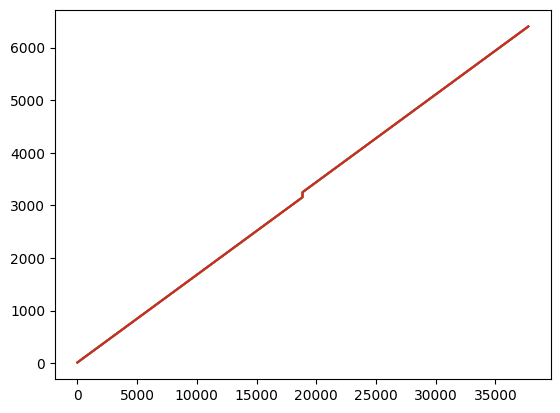

In [54]:
deconv_0 = nwbfile.processing['ophys']['deconvolved_activity_plane_0'].data[:]
deconv_1 = nwbfile.processing['ophys']['deconvolved_activity_plane_1'].data[:]
deconv_2 = nwbfile.processing['ophys']['deconvolved_activity_plane_2'].data[:]
deconv_3 = nwbfile.processing['ophys']['deconvolved_activity_plane_3'].data[:]
imaging_timestamps_0 = nwbfile.processing['ophys']['deconvolved_activity_plane_0'].timestamps
imaging_timestamps_1 = nwbfile.processing['ophys']['deconvolved_activity_plane_1'].timestamps
imaging_timestamps_2 = nwbfile.processing['ophys']['deconvolved_activity_plane_2'].timestamps
imaging_timestamps_3 = nwbfile.processing['ophys']['deconvolved_activity_plane_3'].timestamps

print('Shape of neuronal data for each imaging Plane')
print(deconv_0.T.shape) # Neurons | Timesteps 
print(deconv_1.T.shape) # Neurons | Timesteps 
print(deconv_2.T.shape) # Neurons | Timesteps 
print(deconv_3.T.shape) # Neurons | Timesteps 

deconv = np.concatenate((deconv_0, deconv_1, deconv_2, deconv_3), axis=1)
#print(deconv.T.shape) # Neurons | Timesteps 

print(imaging_timestamps_0[0:9]) # first 9 timesteps
#print(imaging_timestamps_1[0:9]) # first 9 timesteps
#print(imaging_timestamps_2[0:9]) # first 9 timesteps
#print(imaging_timestamps_3[0:9]) # first 9 timesteps

print('Shape of timestamps for each imaging Plane')
print(imaging_timestamps_0.shape)
print(imaging_timestamps_1.shape)
print(imaging_timestamps_2.shape)
print(imaging_timestamps_3.shape)

import matplotlib.pyplot as plt
plt.plot(list(imaging_timestamps_0))
plt.plot(list(imaging_timestamps_1))
plt.plot(list(imaging_timestamps_2))
plt.plot(list(imaging_timestamps_3))
plt.show()
time_diffs_0 = np.diff(imaging_timestamps_0)
mean_time_step_0 = np.mean(time_diffs_0)
time_diffs_1 = np.diff(imaging_timestamps_1)
mean_time_step_1 = np.mean(time_diffs_1)
time_diffs_2 = np.diff(imaging_timestamps_2)
mean_time_step_2 = np.mean(time_diffs_2)
time_diffs_3 = np.diff(imaging_timestamps_3)
mean_time_step_3 = np.mean(time_diffs_3)


In [56]:

bhv = nwbfile.processing['behavior']

#print(bhv.data_interfaces)
pos = bhv['frame_aligned_position']['frame_aligned_forward_and_lateral_position']
#start = pos.data[2458,:]
print(pos.data)


# Assuming pos.data is a NumPy array with shape (188740, 2)
# and imaging_timestamps is a NumPy array with shape (37748,)
forward_threshold = 0.0001  # Adjust this threshold based on the actual data
lateral_threshold = 0.00001   # Adjust this threshold based on the actual data

# Initialize an empty array to store behaviors
movements = np.zeros(imaging_timestamps_0.shape)

# Loop through imaging timestamps and categorize behaviors
for i, timestamp in enumerate(imaging_timestamps_0):
    # Calculate the index directly from the pattern (every 5th index)
    index = i * 5
    
    # Get the forward and lateral positions at the current index
    forward_pos, lateral_pos = pos.data[index]

    # Get the forward and lateral positions at the previous index
    prev_forward_pos, prev_lateral_pos = pos.data[index - 1]
    
    # Calculate changes in forward and lateral positions
    forward_change = forward_pos - prev_forward_pos
    lateral_change = lateral_pos - prev_lateral_pos
    
    #print(lateral_change)
    
    # Categorize behaviors based on changes
    if np.abs(forward_change) < forward_threshold and np.abs(lateral_change) < lateral_threshold:
        movements[i] = 0
    elif forward_change > forward_threshold:
        movements[i] = 1
    elif forward_change < -forward_threshold:
        movements[i] = 2
    elif lateral_change > lateral_threshold:
        movements[i] = 3
    elif lateral_change < -lateral_threshold:
        movements[i] = 4
    else:
        movements[i] = 5

# Now, the 'behaviors' array contains the categorized behaviors for each frame in imaging timestamps.
print(movements.shape)
states = ['standing still', 'moving forward', 'moving backward', 'going right', 'going left', 'invisible']
print(np.unique(movements, return_counts=True))

<HDF5 dataset "data": shape (188740, 2), type "<f8">
(37748,)
(array([0., 1., 2., 3., 4., 5.]), array([  330, 22046,  1569,    34,    21, 13748]))


In [4]:
def create_behavior_choice(timestamps, starts, stops, corrects, switches):
    behavior = np.zeros(timestamps.shape) 
    states = ['none', 'smart', 'followed rule', 'was deceived', 'dumb']
    counter = 0
    for b_idx, time in enumerate(timestamps):
        if counter == len(corrects): 
            behavior[b_idx] = 0
            continue
        if starts[counter] < time < stops[counter]:
            if corrects[counter] and switches[counter]:
                behavior[b_idx] = 1
            elif corrects[counter]:
                behavior[b_idx] = 2
            elif switches[counter]:
                behavior[b_idx] = 3
            else:
                behavior[b_idx] = 4


        else:
            behavior[b_idx] = 0
        if time > stops[counter]:
                counter += 1 
    return behavior, states

In [5]:
trial_df = nwbfile.trials.to_dataframe()
starts = np.asarray(trial_df['start_time'])
stops = np.asarray(trial_df['stop_time'])
corrects = np.asarray(trial_df['is_correct'])
switches = np.asarray(trial_df['is_switch'])
went_left = np.asarray(trial_df['is_choL'])
rule_A = np.asarray(trial_df['is_ruleA'])
cue_B = np.asarray(trial_df['is_cueB'])


behavior_0, s0 = create_behavior_choice(imaging_timestamps_0, starts, stops, corrects, switches)
behavior_1, s1 = create_behavior_choice(imaging_timestamps_1, starts, stops, corrects, switches)
behavior_2, s2 = create_behavior_choice(imaging_timestamps_2, starts, stops, corrects, switches)
behavior_3, s3 = create_behavior_choice(imaging_timestamps_3, starts, stops, corrects, switches)

print(np.unique(behavior_0))
print(behavior_0.shape)
print(np.unique(behavior_1))
print(behavior_1.shape)
print(np.unique(behavior_2))
print(behavior_2.shape)
print(np.unique(behavior_3))
print(behavior_3.shape)


[0. 1. 2. 3. 4.]
(37748,)
[0. 1. 2. 3. 4.]
(37748,)
[0. 1. 2. 3. 4.]
(37748,)
[0. 1. 2. 3. 4.]
(37748,)


B has to be transformed into a integer-array. Translation is accessed by'self.states'.


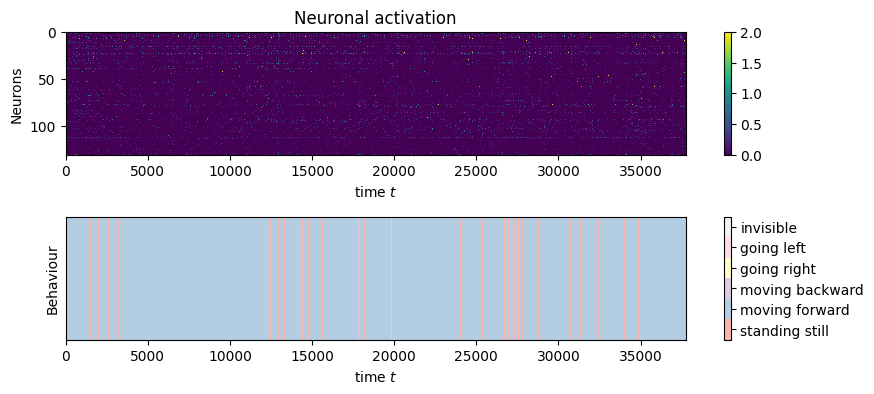

'mouse_plane1_complete = Database(neuron_traces=deconv_1.T, behavior=behavior_1, \n                                 states=s1, fps=mean_time_step_1)\nmouse_plane1_complete.plotting_neuronal_behavioural()\nmouse_plane2_complete = Database(neuron_traces=deconv_2.T, behavior=behavior_2, \n                                 states=s2, fps=mean_time_step_2)\nmouse_plane2_complete.plotting_neuronal_behavioural()\nmouse_plane3_complete = Database(neuron_traces=deconv_3.T, behavior=behavior_3, \n                                 states=s3, fps=mean_time_step_3)\nmouse_plane3_complete.plotting_neuronal_behavioural()'

In [58]:
mouse_plane0_complete = Database(neuron_traces=deconv_0.T, 
                                 behavior=movements,
                                 states=states,
                                 fps=mean_time_step_0)
mouse_plane0_complete.plotting_neuronal_behavioural()

'''mouse_plane1_complete = Database(neuron_traces=deconv_1.T, behavior=behavior_1, 
                                 states=s1, fps=mean_time_step_1)
mouse_plane1_complete.plotting_neuronal_behavioural()
mouse_plane2_complete = Database(neuron_traces=deconv_2.T, behavior=behavior_2, 
                                 states=s2, fps=mean_time_step_2)
mouse_plane2_complete.plotting_neuronal_behavioural()
mouse_plane3_complete = Database(neuron_traces=deconv_3.T, behavior=behavior_3, 
                                 states=s3, fps=mean_time_step_3)
mouse_plane3_complete.plotting_neuronal_behavioural()'''


In [7]:
%matplotlib inline
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
mouse_plane0_complete.fit_model(logreg, binary=True)
mouse_plane0_complete.cluster_BPT(nrep=3, max_clusters=10, plot_markov=True)

logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
mouse_plane1_complete.fit_model(logreg, binary=True)
mouse_plane1_complete.cluster_BPT(nrep=3, max_clusters=10, plot_markov=True)

logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
mouse_plane2_complete.fit_model(logreg, binary=True)
mouse_plane2_complete.cluster_BPT(nrep=3, max_clusters=10, plot_markov=True)

logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
mouse_plane3_complete.fit_model(logreg, binary=True)
mouse_plane3_complete.cluster_BPT(nrep=3, max_clusters=10, plot_markov=True)

Accuracy: 0.8073805234714422
Probability map has shape: (37748, 3)
Testing markovianity - repetition  1


KeyboardInterrupt: 

In [20]:
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
mouse_complete.fit_model(logreg, binary=True)
%matplotlib inline

mouse_complete.cluster_BPT(nrep=3, max_clusters=5, plot_markov=True)

Accuracy: 0.8407597753523366
Probability map has shape: (37748, 3)
Testing markovianity - repetition  1


KeyboardInterrupt: 

In [59]:
mouse_vs = mouse_plane0_complete.createVisualizer(epochs=300)

Losses 0.003671 0.000224 0.003894: 100%|██████████| 300/300 [03:04<00:00,  1.62it/s]


Points have coordinate shape:  (37733, 3)


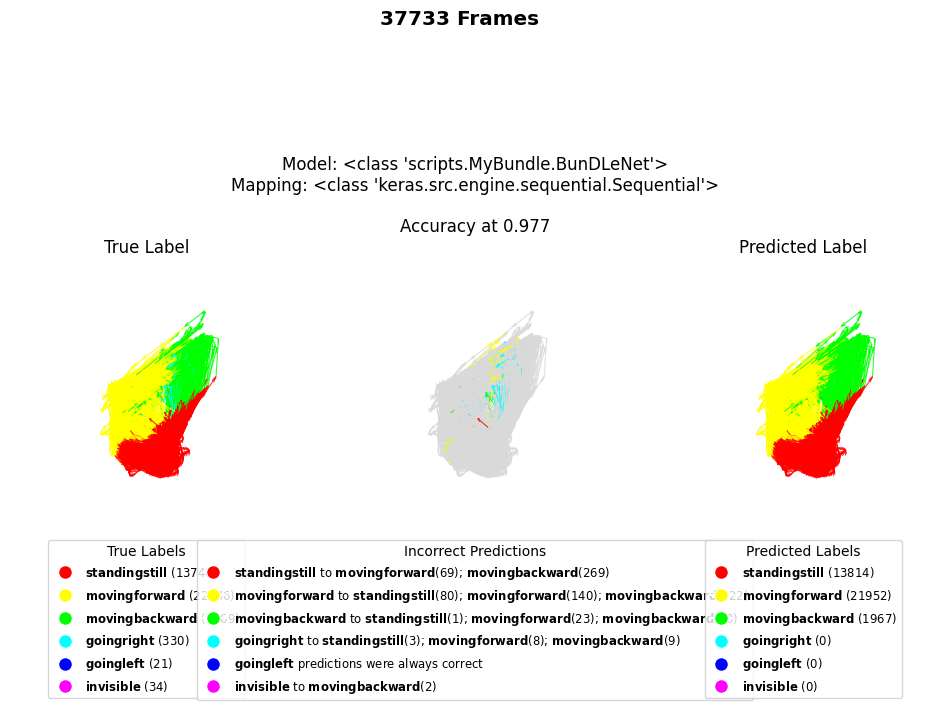

True

In [60]:
%matplotlib inline
#mouse_vs.plot_mapping(show_legend=True, quivers=True)
mouse_vs.make_comparison(show_legend=True, quivers=True)


Accuracy: 0.8884179294267246
Probability map has shape: (37748, 15)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3


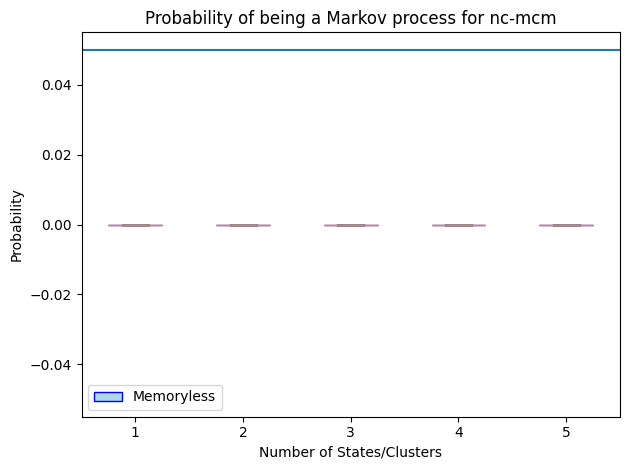

True

In [61]:
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
mouse_plane0_complete.fit_model(logreg, binary=True)
mouse_plane0_complete.cluster_BPT(nrep=3, max_clusters=5)

In [2]:
import os
import pickle
os.chdir('..')
print(os.getcwd())
# Pickle the object
with open(f'data/pickles/data_mouse_epochs300.pkl', 'rb') as file:
    mouse_vs = pickle.load(file)

/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0


In [3]:
mouse_plane0_smaller = mouse_vs.use_mapping_as_input()

X (3, 37733)
Y (37733,)
Y-names (6,)
X-names (3,)


Accuracy: 0.9499907242996847
Probability map has shape: (37733, 15)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5


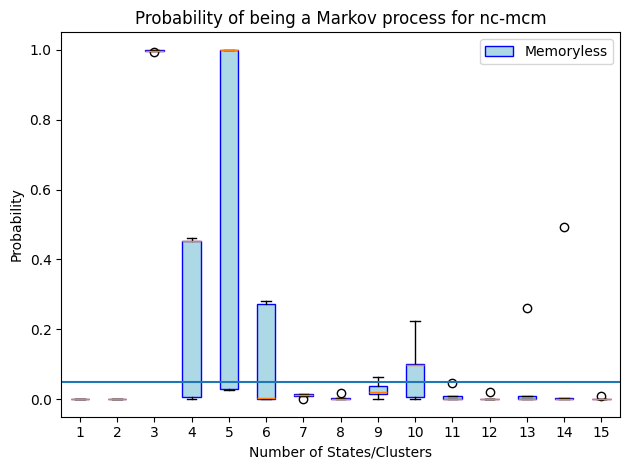

True

In [4]:
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
mouse_plane0_smaller.fit_model(logreg, binary=True)
mouse_plane0_smaller.cluster_BPT(nrep=5, max_clusters=15)

Calcualted threshold is:  0.0006666666666666666


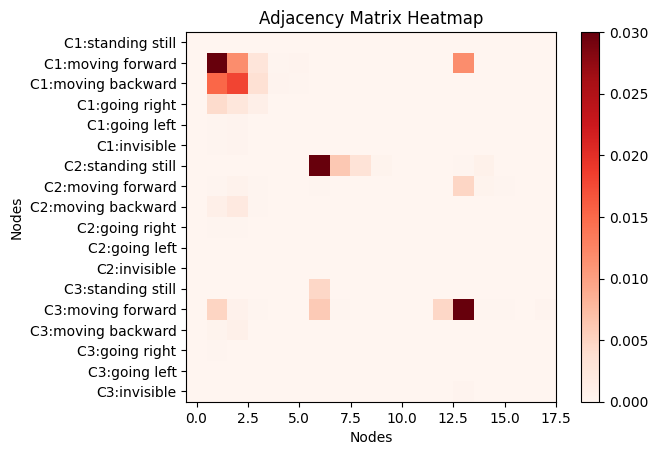

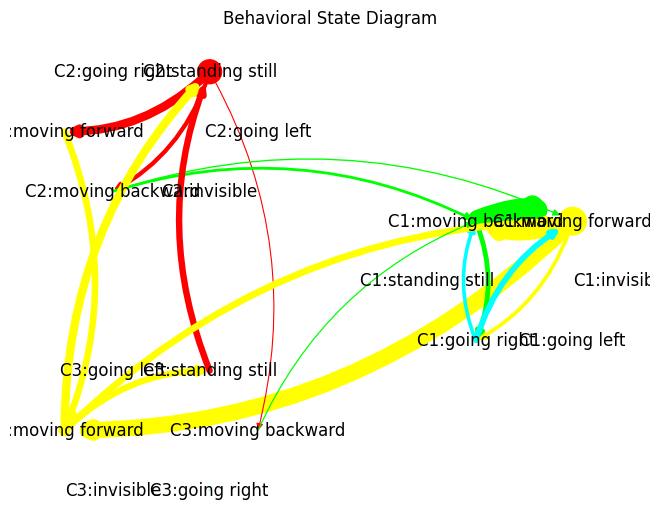

Plot has been saved under: data/plots/Mouse0_smaller_c3Mouse.png
data/plots/Mouse0_smaller_c3.html
Plot has been saved under: data/plots/Mouse0_smaller_c3.html


True

In [5]:
mouse_plane0_smaller.behavioral_state_diagram(cog_stat_num=3, interactive=True)

In [ ]:
mouse2 = mouse_vs.use_latent_dim_as_input()
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
mouse2.fit_model(logreg, binary=True)
%matplotlib inline

mouse2.cluster_BPT(nrep=10, max_clusters=15, plot_markov=True)
mouse2.step_plot(clusters=5, save=True, show=True)
mouse2.behavioral_state_diagram(cog_stat_num=4, interactive=True)



In [32]:
import pickle
# Pickle the object
with open(f'data/pickles/data_mouse_2.pkl', 'wb') as file:
    pickle.dump(mouse2, file)
with open(f'data/pickles/data_mouse_1.pkl', 'wb') as file:
    pickle.dump(mouse_complete, file)

In [31]:
import os
#os.chdir('..')
print(os.getcwd())

/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0


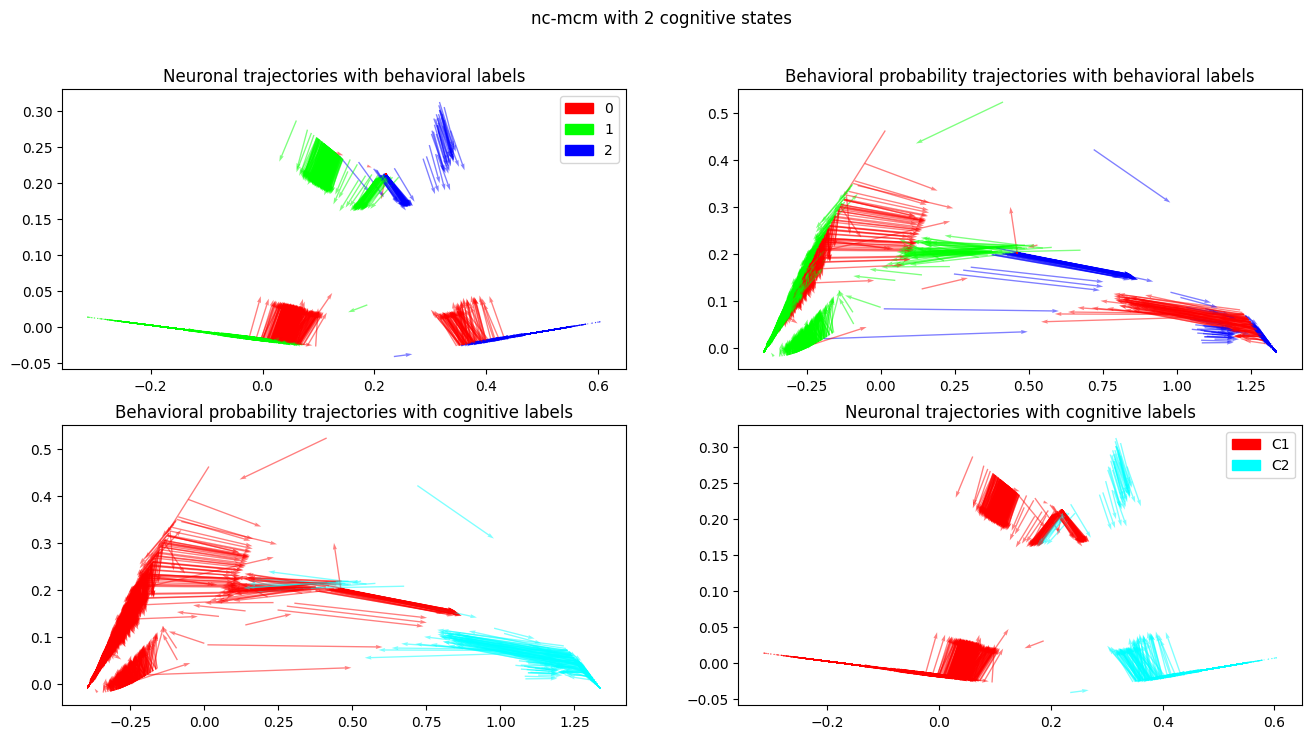

True

In [35]:
mouse2.step_plot(clusters=2, save=False, show=True, png_name='Mouse_step')
#mouse2.behavioral_state_diagram(cog_stat_num=2, save=True, interactive=True)

FIRST 1000 TIMESTEPS RECORDED FOR THE FIRST 7 NEURONS
Trials with wrong choices are orange while correct choices are blue.
Green horizontal lines signal the start of trial and red lines the end.


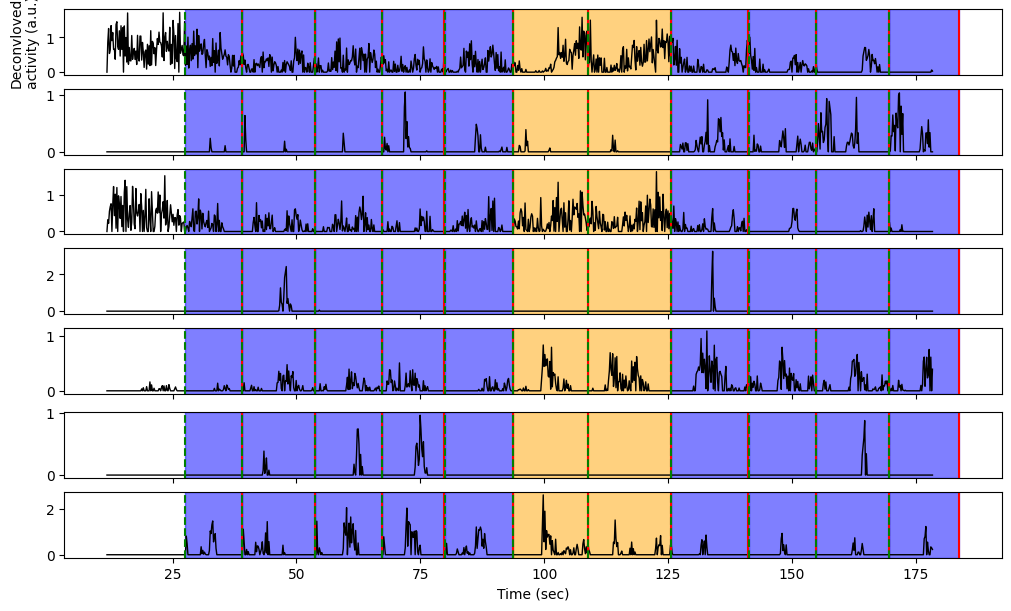

In [10]:
# plot of the deconvloved activity for the first 7 neurons until timestep 250
t_start = 0
t_end = 1000
f, ax = plt.subplots(7 , 1, figsize=(10, 6), constrained_layout=True)

for i_neuron in range(7):
    ax[i_neuron].plot(imaging_timestamps_0[t_start:t_end],deconv_0[t_start:t_end,i_neuron],'k',lw=1)
    if i_neuron == 6:
        ax[i_neuron].set(xlabel='Time (sec)')
    else:
        ax[i_neuron].set(xticklabels=[])
    if i_neuron == 0:
        ax[i_neuron].set(ylabel=f'Deconvloved\nactivity (a.u.)')
        
for index, row in trial_df.iterrows():
    starttime = row['start_time']  
    stoptime = row['stop_time'] 
    correct = row['is_correct'] 
    
    max_trial = imaging_timestamps_0[t_end]
    
    if starttime > max_trial:
        break
        
    for idx in range(7):
        ax[idx].axvline(x=starttime, color='green', linestyle='dashed')
        ax[idx].axvline(x=stoptime, color='red', linestyle='solid')
        if correct:
            ax[idx].axvspan(starttime, stoptime, color='blue', alpha=0.5)
        else:
            ax[idx].axvspan(starttime, stoptime, color='orange', alpha=0.5)
            
print('FIRST 1000 TIMESTEPS RECORDED FOR THE FIRST 7 NEURONS\nTrials with wrong choices are orange while correct choices are blue.\nGreen horizontal lines signal the start of trial and red lines the end.')
